#### Machine Learning Assignment 3
##### Atsu Atakpa

##### Load Train and Test datasets from population_accidents.m
 
##### some stuff to make it easier
import h5py
f = h5py.File('somefile.mat','r')
f.keys()
list(f.get('x_train'))
 
 Create linear regression object called f using the  function called fit
 specify a first order polynomial (i.e. linear fit)
 
 A more comprensive output can be obtained using
 
 Create a variable called y_predicted_train that predicts
 the output for the training dataset
 
 Create a variable called y_predicted_test that predicts
 the output for the test dataset
 
 Plot a diagram of the data.
 1. The x-axis should be the input x-data (the population)
 2. the y-axis should be the output y-data (the number of accidents)
 3. add a grid (graph paper)
 4. add a legend
 5. label the x and y-axis
 6. add a title
 7. Save the result to a png file called linearregression.png
 
 
 save the plot to a png file
 
 calculate the mean square error (MSE) for the prediction of the training and test points
 create variables called mse_train and mse_test
 
 calculate the correlation coefficients for the training called r_train and the test data called r_test
 with the associated linear fits
 
 Draw a scatter diagram to characterize how good the linear estimates of
 the number of accidents are. This scatter diagram should include:
 1. The 1:1 perfect fit line (use the plot function)
 to add curves to the same plot check out 'hold on'
 2. The training data and its associated linear fit (use the scatter function)
 3. The test data and its associated linear fit (use the scatter function)
 4. A legend that contains the R value in the label (check out the legend function and num2str)
 5. Save the result to a png file called linearregression-scatter-m.png (check out the print function)

### Begin

In [1]:
# Load Train and Test datasets from population_accidents.m
 
# some stuff to make it easier
import numpy as np
import h5py
f = h5py.File('C:/Users/atsua/OneDrive/Documents/SMU/6. Machine Learning/Assignment 3/population_accidents.mat','r')
f.keys()
list(f.get('x_train'))


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[array([  572059.,   608827.,   626932.,   642200.,   754844.,   783600.,
          902195.,  1048319.,  1211537.,  1274923.,  1293953.,  1711263.,
         1808344.,  1819046.,  1998257.,  2233169.,  2673400.,  2688418.,
         2926324.,  3405565.,  3421399.,  3450654.,  4012012.,  4041769.,
         4301261.,  4447100.,  4468976.,  5130632.,  5296486.,  5363675.,
         5595211.,  5689283.,  5894121.,  6080485.,  6349097.,  7078515.,
         8186453.,  8414350.,  9938444., 11353140., 12281054., 12419293.,
        15982378., 18976457., 20851820.])]

In [2]:
# Listing the contents of our file
ls = list(f.keys())
ls

['x_test', 'x_train', 'y_test', 'y_train']

In [3]:
x_train = list(f.get('x_train'))
x_test = list(f.get('x_test'))
y_train = list(f.get('y_train'))
y_test = list(f.get('x_test'))

In [4]:
#Checing the content of our training dataset
x_train

[array([  572059.,   608827.,   626932.,   642200.,   754844.,   783600.,
          902195.,  1048319.,  1211537.,  1274923.,  1293953.,  1711263.,
         1808344.,  1819046.,  1998257.,  2233169.,  2673400.,  2688418.,
         2926324.,  3405565.,  3421399.,  3450654.,  4012012.,  4041769.,
         4301261.,  4447100.,  4468976.,  5130632.,  5296486.,  5363675.,
         5595211.,  5689283.,  5894121.,  6080485.,  6349097.,  7078515.,
         8186453.,  8414350.,  9938444., 11353140., 12281054., 12419293.,
        15982378., 18976457., 20851820.])]

#### Linear Regression

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error


In [6]:
#Creating a regression object
regr = linear_model.LinearRegression()

In [7]:
# Let's look at the shape of out datasets
print('The shape of the x_train dataset is',np.shape(x_train))
print('The shape of the y_train dataset is',np.shape(y_train))
print('The shape of the x_test dataset is',np.shape(x_test))
print('The shape of the y_test dataset is',np.shape(y_test))

The shape of the x_train dataset is (1, 45)
The shape of the y_train dataset is (1, 45)
The shape of the x_test dataset is (1, 6)
The shape of the y_test dataset is (1, 6)


In [8]:
# Converting the data to numpy array for better manipulation and transformation before regression
x_train = np.asarray(x_train, dtype=np.float64)
y_train = np.asarray(y_train, dtype=np.float64)
x_test = np.asarray(x_test, dtype=np.float64)
y_test = np.asarray(y_test, dtype=np.float64)

In [9]:
x_train, y_train, x_test, y_test

(array([[  572059.,   608827.,   626932.,   642200.,   754844.,   783600.,
           902195.,  1048319.,  1211537.,  1274923.,  1293953.,  1711263.,
          1808344.,  1819046.,  1998257.,  2233169.,  2673400.,  2688418.,
          2926324.,  3405565.,  3421399.,  3450654.,  4012012.,  4041769.,
          4301261.,  4447100.,  4468976.,  5130632.,  5296486.,  5363675.,
          5595211.,  5689283.,  5894121.,  6080485.,  6349097.,  7078515.,
          8186453.,  8414350.,  9938444., 11353140., 12281054., 12419293.,
         15982378., 18976457., 20851820.]]),
 array([[  43.,   98.,  101.,  100.,  197.,  134.,  229.,   83.,  142.,
          194.,  260.,  254.,  411.,  521.,  395.,  296.,  704.,  461.,
          390.,  291.,  456.,  774., 1046.,  964.,  665., 1154.,  904.,
         1150.,  643.,  792., 1130., 1288.,  563.,  947.,  476.,  925.,
         1634.,  731., 1159., 1286., 1490., 1356., 3244., 1493., 3583.]]),
 array([[  493782.,  1235786.,  2844658.,  4919479.,  8049313., 338

In [10]:
x_train = x_train.reshape(45,1)
y_train = y_train.reshape(45,1)
x_test = x_test.reshape(6,1)
y_test = y_test.reshape(6,1)

In [11]:
#Checking the shape and contents of one of our arrays
np.shape(x_test)
x_test

array([[  493782.],
       [ 1235786.],
       [ 2844658.],
       [ 4919479.],
       [ 8049313.],
       [33871648.]])

In [12]:
#Fitting the data to our training dataset
f = regr.fit(x_train, y_train)

In [13]:
# Running the model on our test dataset
y_predicted_train = f.predict(x_test)

In [14]:
# Printing the Coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.00013244]]


In [15]:
# Printing the MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted_train))

Mean squared error: 207633922776864.38


In [16]:
print('Variance score: %.2f' % r2_score(y_test, y_predicted_train))

Variance score: -0.55


In [17]:
#print('MSE Sklearn is:', mean_squared_error(y,yhat_sklearn))
#print('MSE Numpy is:', mean_squared_error(y,yhat_numpy))

Text(0,0.5,'Number of Accidents')

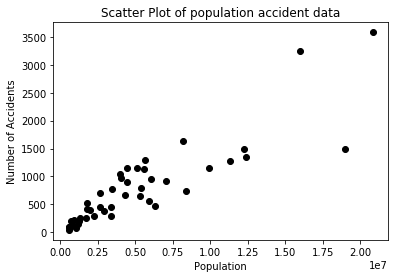

In [25]:
#Creating a scatter plot of our x data
plt.scatter(x_train,y_train,  color='black')
plt.title('Scatter Plot of population accident data')
plt.xlabel('Population')
plt.ylabel('Number of Accidents')

In [19]:
# Printing the MSE For Train and Test
print("Mean squared error for Train: %.2f"
      % mean_squared_error(x_test, y_predicted_train))
print("Mean squared error For Test: %.2f"
      % mean_squared_error(y_test, y_predicted_train))

Mean squared error for Train: 207633922776864.38
Mean squared error For Test: 207633922776864.38


In [20]:
from sklearn.metrics import r2_score
r_value = r2_score(x_test, y_predicted_train) 
r_value

-0.5464940342313962

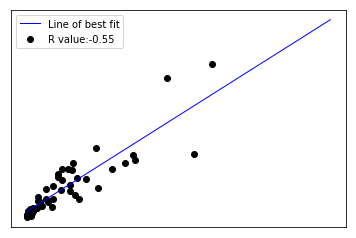

In [23]:
from mlxtend.plotting import plot_linear_regression
plt.scatter(x_train, y_train,  color='black')
plt.plot(x_test, y_predicted_train,color='blue', linewidth=1)
plt.legend(['Line of best fit',"R value:%.2f" %(r_value)])
plt.xticks(())
plt.yticks(())

plt.show()

### References: 
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
